Assignment ID:PES1UG20CS418_Olympics_14

In [1]:
#q1(Olympic dataset)
#importing all the required modules
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

In [4]:
df= pd.read_csv("14.csv")#reading the csv file
df #displaying the dataset

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,30,Pepijn Aardewijn,M,28.0,192.0,76.0,Czechoslovakia,TCH,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
1,62,Giovanni Abagnale,M,23.0,201.0,94.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
2,106,Agostino Abbagnale,M,38.0,191.0,100.0,Germany,GER,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Double Sculls,Gold
3,106,Agostino Abbagnale,M,36.0,191.0,100.0,Germany,GER,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Quadruple Sculls,Gold
4,107,Carmine Abbagnale,M,32.0,185.0,94.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,134585,Zhang Xiuyun,F,30.0,181.0,75.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Women's Double Sculls,Silver
995,134592,Zhang Yangyang,F,21.0,188.0,84.0,China,CHN,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Women's Quadruple Sculls,Gold
996,135169,Marina Nikolayevna Znak,F,37.0,183.0,79.0,Switzerland,SUI,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Women's Coxed Eights,Bronze
997,135545,Henk Jan Zwolle,M,29.0,200.0,97.0,Czechoslovakia,TCH,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze


In [5]:
print(df.shape)#gives the number of rows and columns
print(df.dtypes)#gives the types of data filled in the respective column

(999, 15)
ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object


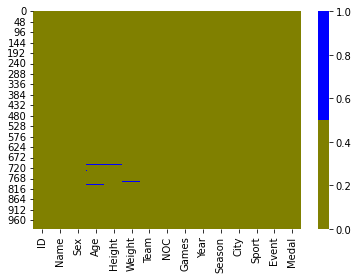

In [8]:
#creating a heatmap to get an idea of all the missing values
cols = df.columns[:30]
colours = ['olive', 'blue'] # specify the colours - blue is missing. olive is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [9]:
df.isnull().sum()#getting the sum of all the missing values in a column

ID         0
Name       0
Sex        0
Age       10
Height     9
Weight     4
Team       0
NOC        0
Games      0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
dtype: int64

In [10]:
#since we know that there are three columns with missing data we can work on cleaning those
mean1=df['Age'].mean() #finding mean of age column
df['Age'].fillna(mean1,inplace=True) #replacing the missing values with mean values of the column

mean2=df['Height'].mean() #finding mean of age column
df['Height'].fillna(mean2,inplace=True)

mean3=df['Weight'].mean() #finding mean of age column
df['Weight'].fillna(mean3,inplace=True)

df#displaying the data after cleaning

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,30,Pepijn Aardewijn,M,28.0,192.0,76.0,Czechoslovakia,TCH,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
1,62,Giovanni Abagnale,M,23.0,201.0,94.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
2,106,Agostino Abbagnale,M,38.0,191.0,100.0,Germany,GER,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Double Sculls,Gold
3,106,Agostino Abbagnale,M,36.0,191.0,100.0,Germany,GER,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Quadruple Sculls,Gold
4,107,Carmine Abbagnale,M,32.0,185.0,94.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,134585,Zhang Xiuyun,F,30.0,181.0,75.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Women's Double Sculls,Silver
995,134592,Zhang Yangyang,F,21.0,188.0,84.0,China,CHN,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Women's Quadruple Sculls,Gold
996,135169,Marina Nikolayevna Znak,F,37.0,183.0,79.0,Switzerland,SUI,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Women's Coxed Eights,Bronze
997,135545,Henk Jan Zwolle,M,29.0,200.0,97.0,Czechoslovakia,TCH,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze


In [11]:
#checking if there are any missing values which might have been missed out in dataset
df.isnull().sum().sum()

0

In [33]:
#q2
df1=df[df['Medal']=='Silver']#creating a data frame of just the age and Silver medal
df2=df1.drop(['ID','Name','Sex','Height','Weight','Team','NOC','Games','Year','Season','City','Sport','Event'],axis=1)
df2 

,Age,Medal
0,28.0,Silver
4,32.0,Silver
5,35.0,Silver
7,33.0,Silver
10,29.0,Silver
...,...,...
987,26.0,Silver
989,31.0,Silver
991,30.0,Silver
993,30.0,Silver


Text(0, 0.5, 'Count')

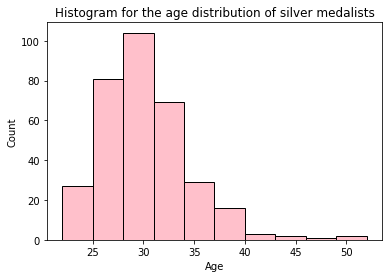

In [44]:
#q2
plt.hist(df2['Age'], color = 'pink', edgecolor = 'black')
plt.title('Histogram for the age distribution of silver medalists')
plt.xlabel('Age')
plt.ylabel('Count')

We notice that there are around 100 silver medalists have an age of 30 years
and lesser than 20 players who have an age of below 35 years.

In [37]:
#q3
def BMI(data):
  return data['Weight']/data['Height']**2
df['BMI']=df.apply(BMI,axis=1)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,30,Pepijn Aardewijn,M,28.0,192.0,76.0,Czechoslovakia,TCH,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,0.002062
1,62,Giovanni Abagnale,M,23.0,201.0,94.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,0.002327
2,106,Agostino Abbagnale,M,38.0,191.0,100.0,Germany,GER,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Double Sculls,Gold,0.002741
3,106,Agostino Abbagnale,M,36.0,191.0,100.0,Germany,GER,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Quadruple Sculls,Gold,0.002741
4,107,Carmine Abbagnale,M,32.0,185.0,94.0,Germany,GER,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Silver,0.002747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,134585,Zhang Xiuyun,F,30.0,181.0,75.0,China,CHN,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Women's Double Sculls,Silver,0.002289
995,134592,Zhang Yangyang,F,21.0,188.0,84.0,China,CHN,2008 Summer,2008,Summer,Beijing,Rowing,Rowing Women's Quadruple Sculls,Gold,0.002377
996,135169,Marina Nikolayevna Znak,F,37.0,183.0,79.0,Switzerland,SUI,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Women's Coxed Eights,Bronze,0.002359
997,135545,Henk Jan Zwolle,M,29.0,200.0,97.0,Czechoslovakia,TCH,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze,0.002425


In [55]:
df.Sport

0      Rowing
1      Rowing
2      Rowing
3      Rowing
4      Rowing
        ...  
994    Rowing
995    Rowing
996    Rowing
997    Rowing
998    Rowing
Name: Sport, Length: 999, dtype: object

The only sport given is Rowing

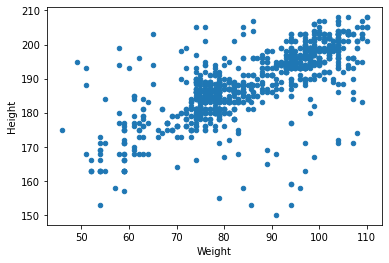

In [45]:
#q4
df.plot.scatter(x='Weight',y='Height')

We can observe that the data points are split in a direction of left to right and hence we can say that there is a **positve correlation** between the two variables.


In [51]:
#q5
df3=df[df['Year']>=2012]#creating a data frame for the years greater that 2012(5 years of data required)
df4=df1.drop(['ID','Name','Height','Weight','Team','NOC','Games','Year','Season','City','Event','Age','Medal'],axis=1)#creating a data frame of just the gender and the sport
df4


,Sex,Sport
0,M,Rowing
4,M,Rowing
5,M,Rowing
7,F,Rowing
10,M,Rowing
...,...,...
987,F,Rowing
989,F,Rowing
991,M,Rowing
993,M,Rowing


In [56]:
gender_counts=df4.Sex.value_counts()
gender_counts#getting the number of male and female participants


M    195
F    139
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x7f0a2decc4d0>,
 [Text(0.28636622847319876, -1.06207079951858, 'M'),
  Text(-0.2863662284731996, 1.0620707995185799, 'F')],
 [Text(0.1561997609853811, -0.5793113451919527, '58.4%'),
  Text(-0.15619976098538157, 0.5793113451919526, '41.6%')])

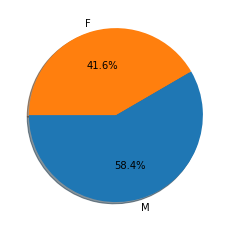

In [57]:
plt.pie(gender_counts,labels=gender_counts.index, 
        autopct='%1.1f%%', startangle=180, shadow=True)

We notice that for the given sport of Rowing, between the years 2012-2016(5 years), the participation consists of 41.6% of Females and 58.4% of Males.


In [58]:
#task details
#q1
team_counts=df.Team.value_counts()
team_counts #finding the tea with maximum participation 

Poland            123
Austria           117
Norway             96
Netherlands        92
Belgium            91
Czechoslovakia     83
Great Britain      82
Germany            43
Croatia            38
Unified Team       29
Lithuania          26
United States      22
Ireland            18
Canada             17
Australia          14
China              14
Switzerland        12
South Africa       12
Bulgaria           11
New Zealand         8
Estonia             8
Czech Republic      8
Ukraine             7
Russia              6
France              6
Finland             4
Slovenia            4
Belarus             2
Italy               2
Greece              2
Romania             1
Denmark             1
Name: Team, dtype: int64

We notice that Poland has the maximum numbre of participation, that is of 123


In [88]:
df5=df[df['Team']=='Poland']#creating a data frame of just Team Poland
df6=df5.drop(['ID','Name','Sex','Age','Height','Weight','NOC','Games','Season','City','Sport','Event','BMI'],axis=1)
df6.sort_values("Year")#sorting based on year

,Team,Year,Medal
604,Poland,1992,Bronze
434,Poland,1992,Silver
443,Poland,1992,Bronze
445,Poland,1992,Bronze
452,Poland,1992,Gold
...,...,...,...
341,Poland,2016,Gold
492,Poland,2016,Gold
762,Poland,2016,Gold
591,Poland,2016,Silver


In [100]:
dict = {}

for index,row in df.iterrows():
  if row['Team'] not in dict.keys():
    dict[row['Team']] = 1
  else:
    dict[row['Team']] += 1

sorted_values = sorted(dict.values(),reverse=True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in dict.keys():
        if dict[k] == i:
            sorted_dict[k] = dict[k]
            break

print(sorted_dict)

{'Poland': 123, 'Austria': 117, 'Norway': 96, 'Netherlands': 92, 'Belgium': 91, 'Czechoslovakia': 83, 'Great Britain': 82, 'Germany': 43, 'Croatia': 38, 'Unified Team': 29, 'Lithuania': 26, 'United States': 22, 'Ireland': 18, 'Canada': 17, 'Australia': 14, 'Switzerland': 12, 'Bulgaria': 11, 'New Zealand': 8, 'Ukraine': 7, 'France': 6, 'Finland': 4, 'Greece': 2, 'Romania': 1}


Hence Poland has the highest number of medals won.

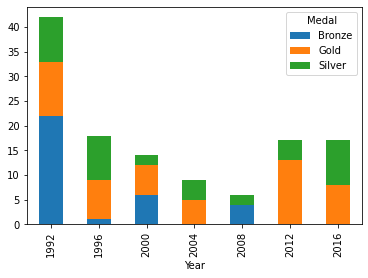

In [102]:
Poland = []
for index,row in df.iterrows():
  if row['Team'] == "Poland":
    Poland.append(row)
Poland_data = pd.DataFrame(Poland)
Poland_data
data_plot = Poland_data.groupby(['Medal', 'Year']).size().reset_index().pivot(columns='Medal', index='Year', values=0)
data_plot.plot(kind='bar', stacked=True)

We notice that in the year 1992, many participants(over 20) won a Bronze medal. In 2008, no gold medal was won. In years 2012 and 2016, the bronze medal was not won at all. There was record number of gold medals in 2012

In [104]:
#q2
df['Year'].groupby(df['Name']).count()
df['Name'].value_counts()
data1 = list(df['Name'].value_counts())
data2 = list(df['Year'].groupby(df['Name']).count()) # dataframe with athlete and number of medals
list1 = list(zip(data1, data2))
result = []
for i,j in list1 : 
    result.append(i/j) #using the given formula for successes
data1 = pd.DataFrame(df['Name'].value_counts())
data1['Success'] = result
data1

,Name,Success
Georgeta Damian-Andrunache,6,6.0
Doina Ignat,6,6.0
Elisabeta Oleniuc-Lip,5,5.0
Yekaterina Anatolyevna Khodotovich-Karsten,5,5.0
Viorica Susanu,5,5.0
...,...,...
Claudia Renate Belderbos,1,1.0
Emily Regan,1,1.0
Daniel Noonan,1,1.0
Shannon Crawford,1,0.5


We notice that Georgeta Damian-Andrunache and Doina Ignat is the most successful participant who has record successes of 6 time.